# Compare Efficiency Maps

In [15]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from itertools import product
import seaborn as sns
from matplotlib.colors import LogNorm
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [16]:
#Load scan data for full EWK scenario
dataDF = pd.read_pickle('./validation/ewk_results/ewkRecast.pcl')
#Load scan data for simplified EWK scenario
dataDF_simp = pd.read_pickle('./N2N1Recast.pcl')

### Plot efficiencies

/tmp/ipykernel_151520/3098377706.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


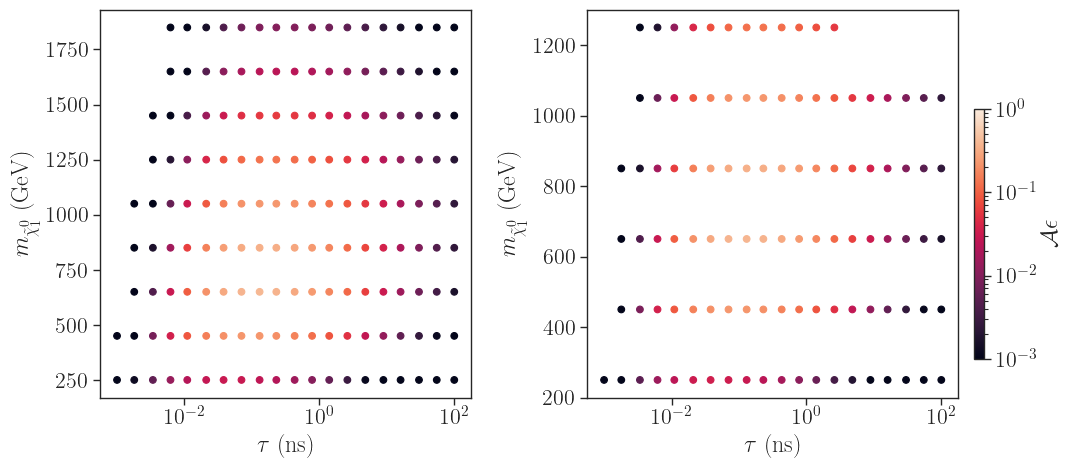

In [17]:
fig,axarr = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sr = 'Trackless'
for idf,df in enumerate([dataDF,dataDF_simp]):
    ax = axarr[idf]
    pts = df[df['SR'] == sr][['mLLP','tau_ns','AccEff']].to_numpy()
    p = ax.scatter(pts[:,1],pts[:,0],c=pts[:,2],norm=LogNorm(vmin=1e-3,vmax=1.0))
    ax.set_xscale('log')
    ax.set_xlabel(r'$\tau$ (ns)')
    ax.set_ylabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
    # ax.set_ylim(200.,500.)

fig.subplots_adjust(right=0.9,top=1.1)
cbar_ax = fig.add_axes([0.99, 0.25, 0.01, 0.5]) 
fig.colorbar(p,label=r'$\mathcal{A} \epsilon$',cax=cbar_ax)
plt.tight_layout()
plt.show()


### Plot Ratio

In [18]:

dataDF_all = dataDF_simp.merge(dataDF,on=['mLLP','mLSP','tau_ns','SR'],how='left')

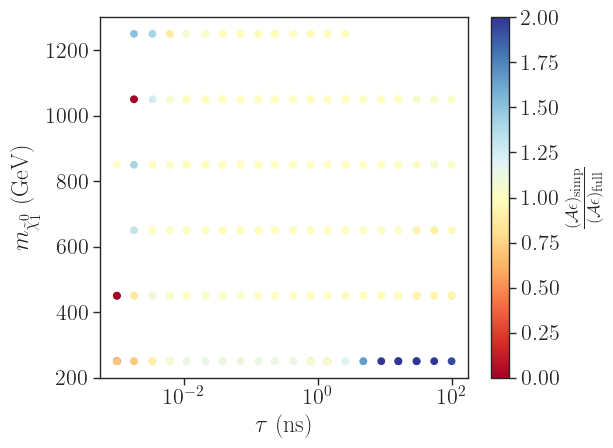

In [19]:
plt.scatter(dataDF_all['tau_ns'],dataDF_all['mLLP'],c=(dataDF_all['AccEff_x']/dataDF_all['AccEff_y']),vmin=0.,vmax=2.,cmap=cm)
plt.colorbar(label=r'$\frac{( \mathcal{A} \epsilon )_{\rm simp}}{( \mathcal{A} \epsilon)_{\rm full}}$')
plt.xscale('log')
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
# plt.ylim(200.,500.)
plt.tight_layout()
plt.show()


In [20]:
dataDF[(dataDF['tau_ns'] > 10.0) & (dataDF['mLLP'] == 250.0) & (dataDF['SR'] == 'Trackless')].T

,65,69,73,77
Luminosity (1/fb),139.0,139.0,139.0,139.0
SR,Trackless,Trackless,Trackless,Trackless
$N_s$,9.44,5.556,2.535,2.291
$N_s$ Err,2.102,1.335,0.9319,0.8556
AccEff,0.000143,0.000084,0.000038,0.000035
AccEffErr,0.000032,0.00002,0.000014,0.000013
Total,"(66110.0, 1.0)","(66110.0, 1.0)","(66110.0, 1.0)","(66110.0, 1.0)"
Total Error,"(418.1, 0.0)","(418.1, 0.0)","(418.1, 0.0)","(418.1, 0.0)"
Jet selection,"(1719.0, 0.026)","(1097.0, 0.0166)","(666.4, 0.01008)","(415.2, 0.00628)"
Jet selection Error,"(67.42, 0.00102)","(53.87, 0.0008149)","(41.98, 0.000635)","(33.13, 0.0005012)"


In [21]:
dataDF_simp[(dataDF_simp['tau_ns'] > 10.0) & (dataDF_simp['mLLP'] == 250.0) & (dataDF_simp['SR'] == 'Trackless')].T

,63,65,67,69
Luminosity (1/fb),139.0,139.0,139.0,139.0
SR,Trackless,Trackless,Trackless,Trackless
$N_s$,4.711,3.09,1.454,0.7612
$N_s$ Err,0.9651,0.73,0.5482,0.2657
AccEff,0.000416,0.000273,0.000129,0.000067
AccEffErr,0.000085,0.000065,0.000048,0.000023
Total,"(11310.0, 1.0)","(11310.0, 1.0)","(11310.0, 1.0)","(11310.0, 1.0)"
Total Error,"(71.56, 0.0)","(71.56, 0.0)","(71.56, 0.0)","(71.56, 0.0)"
Jet selection,"(323.1, 0.02856)","(210.0, 0.01856)","(127.2, 0.01124)","(81.46, 0.0072)"
Jet selection Error,"(12.09, 0.001069)","(9.749, 0.0008616)","(7.586, 0.0006705)","(6.072, 0.0005367)"
